<a href="https://colab.research.google.com/github/stakunlena/ich_final_project/blob/main/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

**Цель:** выявить закономерности, влияющие на эффективность маркетинга, продаж и обучения.

**Источник данных:** очищенные CSV-файлы:
- `df_contacts_clean_YYYYMMDD.csv`
- `df_calls_clean_YYYYMMDD.csv`
- `df_deals_clean_YYYYMMDD.csv`
- `df_spend_clean_YYYYMMDD.csv`

**Структура ноутбука:**
1. Загрузка данных и первичный обзор  
2. Описательная статистика  
3. Анализ временных рядов  
4. Анализ эффективности кампаний  
5. Эффективность отдела продаж  
6. Анализ платежей и продуктов  
7. Географический анализ  
8. Сводные выводы и экспорт агрегатов

## 1. Загрузка данных и первичный обзор

In [30]:
# Импортируем основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="Blues_d") # Устанавливаем единый стиль для всех диаграмм

# Загружаем исходные данные
import os
from google.colab import drive # Импортируем библиотеку для работы с Google Drive

# Подключаем Google Drive
drive.mount('/content/drive')

# Путь к папке с данными
base_path = '/content/drive/MyDrive/P. Project 07.11/csv/'

df_contacts = pd.read_csv(base_path + 'df_contacts_clean_20251028_0104.csv', sep=";", encoding="utf-8-sig", parse_dates=["created_time", "modified_time"])
df_calls = pd.read_csv(base_path + 'df_calls_clean_20251028_0104.csv', sep=";", encoding="utf-8-sig", parse_dates=["call_start_time"])
df_deals = pd.read_csv(base_path + 'df_deals_clean_20251028_0104.csv', sep=";", encoding="utf-8-sig", parse_dates=["created_time", "closing_date"])
df_spend = pd.read_csv(base_path + 'df_spend_clean_20251028_0104.csv', sep=";", encoding="utf-8-sig", parse_dates=["date"])

print(f"Contacts: {df_contacts.shape} | Calls: {df_calls.shape} | Deals: {df_deals.shape} | Spend: {df_spend.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contacts: (18547, 4) | Calls: (95874, 9) | Deals: (21590, 25) | Spend: (19862, 12)


Проверим структуру, типы данных и наличие пропусков.

In [31]:
for name, df in {"Contacts": df_contacts, "Calls": df_calls, "Deals": df_deals, "Spend": df_spend}.items():
    print(f"\n=== {name} ===")
    display(df.head(3))
    print(f"\n{df.info()}")
    print(f"\n{df.isna().sum()}")


=== Contacts ===


,id,contact_owner_name,created_time,modified_time
0,5805028000000645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00
1,5805028000000872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00
2,5805028000000889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  18547 non-null  int64         
 1   contact_owner_name  18547 non-null  object        
 2   created_time        18547 non-null  datetime64[ns]
 3   modified_time       18547 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 579.7+ KB

None

id                    0
contact_owner_name    0
created_time          0
modified_time         0
dtype: int64

=== Calls ===


,id,call_start_time,call_owner_name,contactid,call_type,call_duration_in_seconds_,call_status,outgoing_call_status,scheduled_in_crm
0,5805028000000805001,2023-06-30 08:43:00,John Doe,NaN,inbound,171,received,NaN,0
1,5805028000000768006,2023-06-30 08:46:00,John Doe,NaN,outbound,28,attended dialled,completed,0
2,5805028000000764027,2023-06-30 08:59:00,John Doe,NaN,outbound,24,attended dialled,completed,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         95874 non-null  int64         
 1   call_start_time            95874 non-null  datetime64[ns]
 2   call_owner_name            95874 non-null  object        
 3   contactid                  95379 non-null  float64       
 4   call_type                  95874 non-null  object        
 5   call_duration_in_seconds_  95874 non-null  int64         
 6   call_status                95874 non-null  object        
 7   outgoing_call_status       86875 non-null  object        
 8   scheduled_in_crm           95874 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 6.6+ MB

None

id                              0
call_start_time                 0
call_owner_name                 0
contactid

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,term,source,payment_type,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch,stage_normalized,quality_normalized
0,5.805028e+18,Ben Hall,NaT,NaN,new lead,NaN,/eng/test,03.07.23women,NaN,v16,women,facebook ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN,New Lead,Undefined
1,5.805028e+18,Ulysses Adams,NaT,NaN,new lead,NaN,/at-eng,NaN,NaN,NaN,NaN,organic,NaN,web developer,morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5.805028e+18,NaN,NaN,New Lead,Undefined
2,5.805028e+18,Ulysses Adams,NaT,d - non target,lost,non target,/at-eng,engwien_at,00:26:43,b1-at,21_06_2024,telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN,Lost,D - Non Target


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21590 entries, 0 to 21589
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21590 non-null  float64       
 1   deal_owner_name      21561 non-null  object        
 2   closing_date         0 non-null      datetime64[ns]
 3   quality              19338 non-null  object        
 4   stage                21590 non-null  object        
 5   lost_reason          16122 non-null  object        
 6   page                 21590 non-null  object        
 7   campaign             16066 non-null  object        
 8   sla                  15533 non-null  object        
 9   content              14146 non-null  object        
 10  term                 12453 non-null  object        
 11  source               21590 non-null  object        
 12  payment_type         496 non-null    object        
 13  product              3592 non-n

,date,source,campaign,impressions,spend,clicks,adgroup,ad,ctr,cpc,cpm,efficiency_index
0,2023-07-03,google ads,gen_analyst_de,6,0.00,0,NaN,NaN,0.0,NaN,0.0,NaN
1,2023-07-03,google ads,performancemax_eng_de,4,0.01,1,NaN,NaN,25.0,0.01,2.5,2500.0
2,2023-07-03,facebook ads,NaN,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              19862 non-null  datetime64[ns]
 1   source            19862 non-null  object        
 2   campaign          14785 non-null  object        
 3   impressions       19862 non-null  int64         
 4   spend             19862 non-null  float64       
 5   clicks            19862 non-null  int64         
 6   adgroup           13951 non-null  object        
 7   ad                13951 non-null  object        
 8   ctr               15028 non-null  float64       
 9   cpc               10608 non-null  float64       
 10  cpm               15028 non-null  float64       
 11  efficiency_index  10238 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 1.8+ MB

None

date                   0
source                

## 2. Описательная статистика

In [48]:
def eda_plot(df, column_name, title='', bins=30, show_stats=True):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    series = df[column_name].dropna()
    dtype = df[column_name].dtype

    if series.empty:
        print(f"Столбец '{column_name}' содержит только пропуски. Пропущен.")
        return

    if pd.api.types.is_numeric_dtype(dtype):
        fig, (ax_box, ax_hist) = plt.subplots(
            nrows=2, figsize=(8, 4), sharex=True,
            gridspec_kw={"height_ratios": [0.15, 0.85]}
        )
        sns.boxplot(x=series, ax=ax_box, color="#4C72B0")
        sns.histplot(x=series, bins=bins, kde=True, ax=ax_hist, color="#4C72B0")
        ax_box.set(title=title or column_name, xlabel='')
        ax_box.grid(False)
        ax_hist.set_xlabel(column_name)
        ax_hist.set_ylabel("Частота")
        plt.tight_layout()
        plt.show()

        if show_stats:
            stats = series.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).to_dict()
            stats.update({
                "missing": df[column_name].isna().sum(),
                "zeros": (df[column_name] == 0).sum(),
                "negatives": (df[column_name] < 0).sum()
            })
            display(pd.DataFrame(stats, index=[column_name]).T)
            #display(pd.DataFrame(stats, index=[column_name]))

    else:
        plt.figure(figsize=(8, 4))
        order = series.value_counts().index
        sns.countplot(y=series, order=order, palette="Blues_d")
        plt.title(title or column_name)
        plt.xlabel("Количество")
        plt.ylabel(column_name)
        plt.tight_layout()
        plt.show()

        if show_stats:
            freq = series.value_counts(dropna=False).to_frame("count")
            freq["%"] = (freq["count"] / len(df) * 100).round(2)
            display(freq)


### 2.1. Числовые признаки. Обзор
Анализ описательной статистики: распределение, среднее, медиана,диапазон, квартили, стандартное отклонение, выбросы.

#### 2.1.1. `impressions` — количество показов рекламы (df_spend)

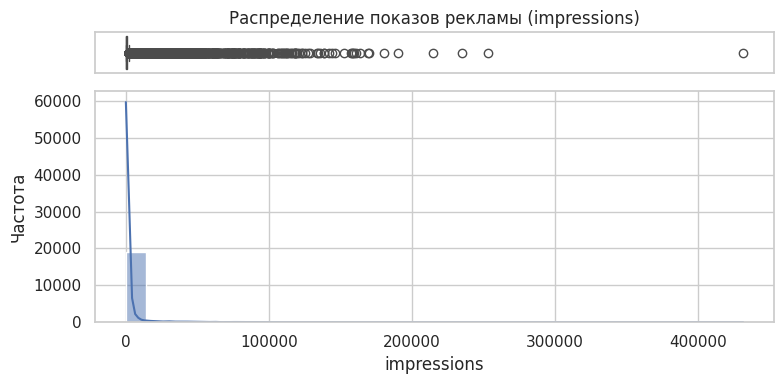

,impressions
count,19862.000000
mean,2571.695197
std,11691.227016
min,0.000000
1%,0.000000
25%,1.000000
50%,82.000000
75%,760.750000
99%,60499.900000
max,431445.000000


In [49]:
eda_plot(df_spend, "impressions", "Распределение показов рекламы (impressions)")

**Выводы по изучению параметра `impressions` (количество показов рекламы)**

* Распределение **асимметричное, сильно скошено вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **759.75** (760.75 − 1.00).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 760.75 + 1.5×759.75 ≈ **1 900**  
  Это значение примерно в **30 раз ниже 99-го перцентиля (≈60 500)**, что говорит о крайне длинном «хвосте» распределения.  
* Среднее значение **2571.7** значительно превышает медиану (**82**), что подтверждает наличие выраженного перекоса — большинство кампаний имеют очень низкие значения, а небольшое количество записей с большими показателями сильно «тянут» среднее вверх.  
* Стандартное отклонение **11 691**, почти в **4,5 раза выше среднего**, что свидетельствует о высокой вариативности данных и низкой плотности в пределах нормального диапазона.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`impressions` = 0) встречаются в **4 834 строках** (примерно **24%** всех наблюдений), что указывает на значительную долю записей без фактических показов (например, объявления, не запущенные в показ).  
* Пропусков нет.  

**Интерпретация распределения:**  
* Показатели `impressions` описываются **логнормальным распределением** с редкими крупными выбросами.  
* Наблюдается концентрация большинства кампаний в диапазоне до **1 000 показов**,при этом единичные объявления с десятками тысяч показов искажают форму распределения.  
* Можно считать, что “нормальный” диапазон для активных объявлений — **от 1 до ~2 000 показов**.  

**Решения по обработке:**  
1. При анализе CTR (Click-Through Rate) исключить строки, где `impressions` = 0, чтобы избежать деления на ноль.  
2. При моделировании (например, регрессии) отсекать верхние **1–2%** значений (обрезка на уровне 99-го перцентиля ≈ 60 000) или рассматривать их как отдельный сегмент «высокобюджетные кампании».

#### 2.1.2. `clicks` — количество кликов по рекламе (df_spend)

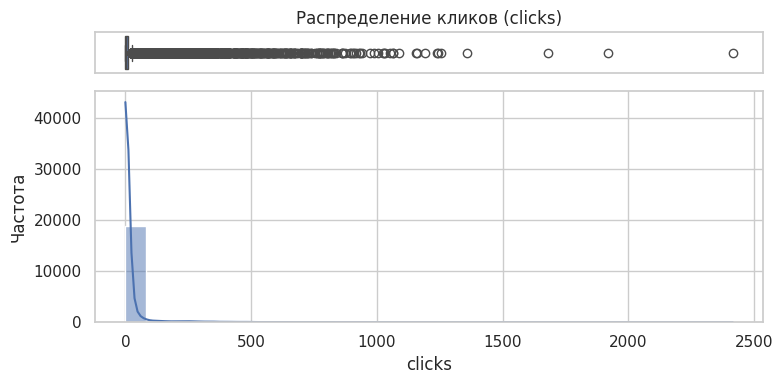

,clicks
count,19862.000000
mean,21.118115
std,84.388659
min,0.000000
1%,0.000000
25%,0.000000
50%,1.000000
75%,10.000000
99%,436.000000
max,2415.000000


In [50]:
eda_plot(df_spend, "clicks", "Распределение кликов (clicks)")

**Выводы по изучению параметра `clicks` (количество кликов по рекламе)**

* Распределение **асимметричное, сильно скошено вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **10** (10 − 0).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 10 + 1.5×10 = **25**  
  Это значение примерно в **17 раз ниже 99-го перцентиля (≈436)**, что указывает на длинный правый «хвост» распределения.  
* Среднее значение **21.12** примерно в **21 раз выше медианы (1)**, что подтверждает наличие выраженного перекоса —  
  большинство кампаний имеют очень малое число кликов, а относительно небольшое количество записей с сотнями кликов существенно увеличивает среднее значение.  
* Стандартное отклонение **84.39**, в **4 раза выше среднего**, что свидетельствует о высокой вариативности данных и большом числе выбросов.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`clicks` = 0) встречаются в **9 254 строках** (примерно **46,6%** всех наблюдений), что указывает на значительную долю показов без кликов.  
* Пропусков нет.  

**Интерпретация распределения:**  
* Показатели `clicks` описываются **логнормальным распределением** с выраженным длинным правым хвостом.  
* Большинство кампаний получают от **1 до 10 кликов**, а небольшое число объявлений достигает сотен кликов и формирует хвост на распределении.  
* Нормальный диапазон активности можно оценить как **от 1 до ~25 кликов**.

**Решения по обработке:**  
1. При анализе CTR (Click-Through Rate) **исключить строки, где `impressions` = 0** (деление невозможно), но **сохранять строки, где `clicks` = 0**, так как они отражают неэффективные показы (CTR = 0).  
2. При необходимости отбора «типичных» кампаний — отсекать верхние **1–2%** значений (обрезка на уровне 99-го перцентиля ≈ 436) или выделить их в отдельный сегмент «высокоактивные кампании».


#### 2.1.3. `spend` — распределение рекламных расходов (df_spend)

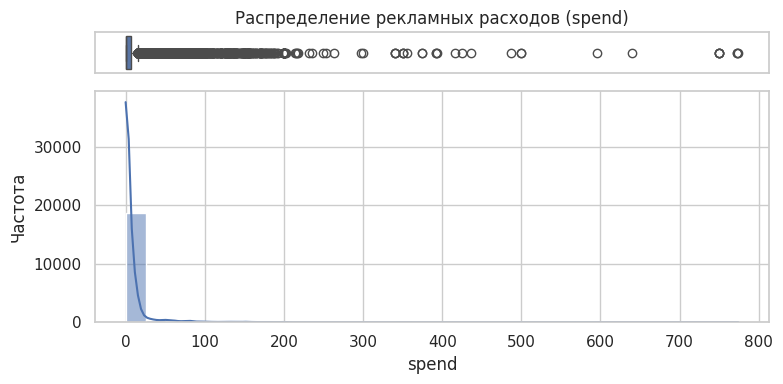

,spend
count,19862.000000
mean,7.528117
std,27.325150
min,0.000000
1%,0.000000
25%,0.000000
50%,0.740000
75%,6.160000
99%,114.524700
max,774.000000


In [51]:
eda_plot(df_spend, "spend", "Распределение рекламных расходов (spend)")

**Выводы по изучению параметра `spend` (рекламные расходы)**

* Распределение **асимметричное, сильно скошено вправо**  
* Межквартильный размах (IQR = Q3 − Q1) равен **6.16** (6.16 − 0.00).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 6.16 + 1.5×6.16 = **15.5**  
  Это значение примерно в **7 раз ниже 99-го перцентиля (≈114.5)**, что свидетельствует о наличии длинного «хвоста» распределения и выраженных выбросов.  
* Среднее значение **7.53** примерно в **10 раз выше медианы (0.74)**, что подтверждает сильный перекос —  
  большинство кампаний расходуют незначительные суммы, а редкие крупные кампании значительно повышают среднее значение.  
* Стандартное отклонение **27.33**, более чем в **3,5 раза превышает среднее**, что указывает на высокую вариативность данных.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`spend` = 0) встречаются в **5 594 строках** (около **28%** всех наблюдений), что указывает на значительное количество кампаний без расходов или с нулевым бюджетом.  
* Пропусков нет.  

**Интерпретация распределения:**  
* Показатели `spend` описываются **логнормальным распределением** с длинным правым хвостом.  
* Большинство кампаний укладываются в диапазон **от 0 до 15 ед.**, в то время как небольшое число кампаний с расходами выше **100 ед.** формируют крайние значения распределения.  
* Можно считать, что «нормальный» диапазон рекламных расходов — **до 15–20 единиц**.

**Решения по обработке:**  
1. При расчёте показателей эффективности (CTR, CPC, CPM) **сохранять строки с `spend` = 0**, так как они отражают кампании без затрат.  
2. Для предотвращения влияния экстремальных значений при расчётах агрегатов — отсечь верхние **1–2%** значений (обрезка на уровне 99-го перцентиля ≈ 115) или рассматривать их как отдельный сегмент «высокобюджетные кампании».

#### 2.1.4. `initial_amount_paid` — первоначальные платежи (df_deals)

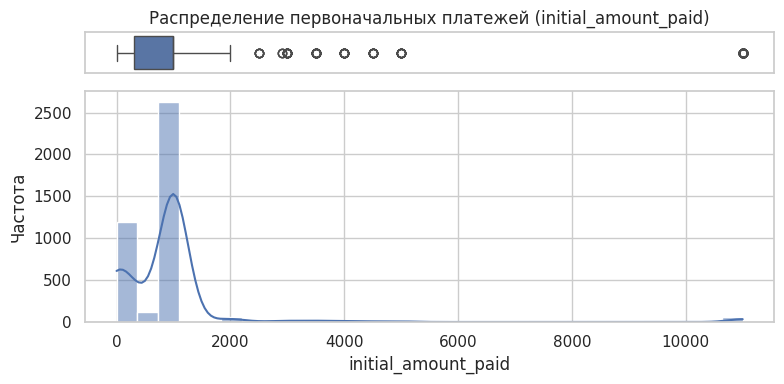

,initial_amount_paid
count,4165.000000
mean,929.796639
std,1347.438755
min,0.000000
1%,0.000000
25%,300.000000
50%,1000.000000
75%,1000.000000
99%,11000.000000
max,11000.000000


In [52]:
eda_plot(df_deals, "initial_amount_paid", "Распределение первоначальных платежей (initial_amount_paid)")

**Выводы по изучению параметра `initial_amount_paid` (первоначальный платёж клиента)**

* Распределение **асимметричное, сильно скошено вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **700** (1000 − 300).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 1000 + 1.5×700 = **2050**  
  Это значение примерно в **5 раз ниже 99-го перцентиля (≈11 000)**, что свидетельствует о наличии сильных выбросов и очень длинного правого хвоста распределения.  
* Среднее значение **929.80** немного ниже медианы (**1000**), что указывает на лёгкий перекос распределения влево в области основных значений, но длинный правый хвост всё же присутствует из-за редких крупных платежей.  
* Стандартное отклонение **1347.44**, превышающее среднее более чем в **1,4 раза**, отражает высокую вариативность и значительную разницу между минимальными и максимальными суммами.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`initial_amount_paid` = 0) встречаются в **877 записях** (около **21%** наблюдений с непустыми значениями), что может отражать регистрацию без предоплаты или отложенный платёж.  
* Пропусков — **17 425** строк (около **80%** всего массива данных), что требует отдельного анализа: часть сделок могла не дойти до стадии оплаты, либо данные не были загружены из CRM.  

**Интерпретация распределения:**  
* Показатели `initial_amount_paid` описываются **логнормальным распределением с экстремальными выбросами**.  
* Большинство студентов совершают оплату в диапазоне **от 300 до 1 000 ед.**,  
при этом единичные платежи свыше **10 000 ед.** относятся к аномально высоким (вероятно, полная оплата обучения или корпоративные пакеты).  
* Можно считать, что типичный диапазон первоначальных платежей — **300–2 000 единиц**.

**Решения по обработке:**  
1. **Пропущенные значения (`NaN`)** интерпретировать как сделки без оплаты — не заполнять, но учитывать долю неоплаченных лидов при анализе конверсий.  
2. При анализе доходов **оставлять строки с `initial_amount_paid` = 0**, поскольку они отражают клиентов без фактического платежа.  
3. Для снижения влияния выбросов отсекать **1–2%** значений (обрезка на уровне 99-го перцентиля ≈ 11 000) или выделить эти наблюдения в отдельную категорию «высокие платежи».

#### 2.1.5. `offer_total_amount` — общая сумма предложения (df_deals)

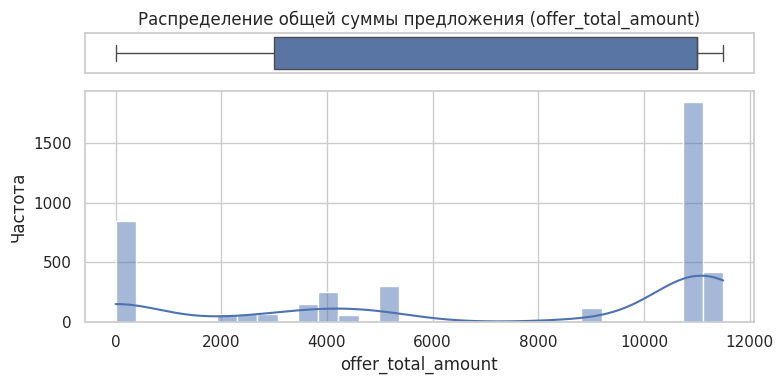

,offer_total_amount
count,4185.000000
mean,7148.917563
std,4631.221731
min,0.000000
1%,0.000000
25%,3000.000000
50%,11000.000000
75%,11000.000000
99%,11500.000000
max,11500.000000


In [53]:
eda_plot(df_deals, "offer_total_amount", "Распределение общей суммы предложения (offer_total_amount)")

**Выводы по изучению параметра `offer_total_amount` (общая сумма предложения клиенту)**

* Распределение **асимметричное, с заметным смещением вправо**.  
* Межквартильный размах (IQR = Q3 − Q1) равен **8 000** (11 000 − 3 000).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум в выборке)  
  - **верхняя** — Q3 + 1.5×IQR = 11 000 + 1.5×8 000 = **23 000**  
  Поскольку фактический максимум составляет **11 500**, выбросы отсутствуют — все значения находятся в пределах ожидаемого диапазона.  
* Среднее значение **7 148.92** заметно ниже медианы (**11 000**), что говорит о **левостороннем смещении** —  
  в выборке много предложений с меньшими суммами, но медианное значение остаётся высоким из-за доминирования фиксированных цен на уровне 11 000.  
* Стандартное отклонение **4 631.22**, что составляет около **65%** от среднего, указывает на умеренную вариативность внутри типового диапазона цен.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`offer_total_amount` = 0) встречаются в **847 записях** (примерно **20%** наблюдений с непустыми значениями), что может отражать лиды без оформленного предложения или тестовые карточки.  
* Пропусков — **17 405 строк (≈80%)**, что связано с тем, что это поле заполняется только для квалифицированных или закрытых сделок.

**Интерпретация распределения:**  
* Показатели `offer_total_amount` имеют **кластеризованное распределение** с концентрацией около **11 000 единиц**, что, вероятно, соответствует базовой стоимости основного курса.  
* Значительная часть предложений ниже 5 000 указывает на наличие коротких или льготных программ.  
* Таким образом, “типичный” диапазон коммерческих предложений можно оценить как **от 3 000 до 11 000 единиц**.

**Решения по обработке:**  
1. Пропущенные значения (`NaN`) **не заполнять**, они отражают лиды без предложений.  
2. Нулевые значения (`0`) рассматривать как технические и при необходимости **исключать** из расчётов средних цен.  
3. При построении визуализаций группировать данные в категории, например:  
   - до 3 000 — низкий ценовой сегмент,  
   - 3 000–8 000 — средний сегмент,  
   - свыше 8 000 — высокий сегмент предложений.

#### 2.1.6. `course_duration` — длительность курса (df_deals)

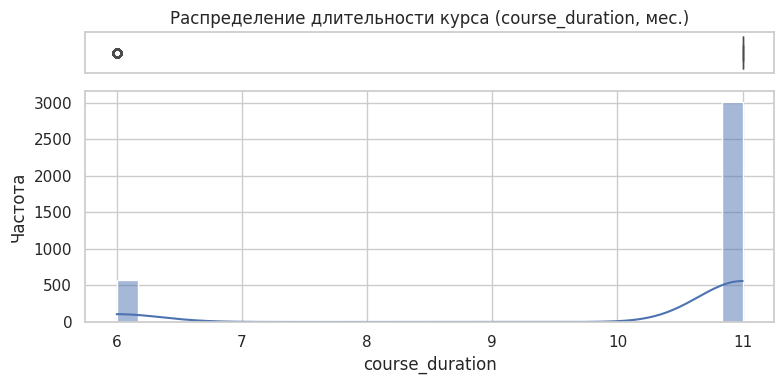

,course_duration
count,3587.000000
mean,10.198495
std,1.834681
min,6.000000
1%,6.000000
25%,11.000000
50%,11.000000
75%,11.000000
99%,11.000000
max,11.000000


In [54]:
eda_plot(df_deals, "course_duration", "Распределение длительности курса (course_duration, мес.)")

**Выводы по изучению параметра `course_duration` (длительность курса, мес.)**

* Распределение **асимметричное, с ярко выраженным пиком**, близким к дискретному значению — почти все курсы имеют одинаковую длительность.  
* Межквартильный размах (IQR = Q3 − Q1) равен **0** (11 − 11), что отражает **отсутствие разброса** между квартилями.  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 11,  
  - **верхняя** — Q3 + 1.5×IQR = 11.  
  Таким образом, **все значения находятся в пределах нормы**, выбросов нет.  
* Среднее значение **10.20** немного ниже медианы (**11.00**), что указывает на незначительный перекос влево, обусловленный присутствием коротких программ (6 месяцев).  
* Стандартное отклонение **1.83**, то есть менее **20%** от среднего, что говорит о высокой однородности длительности курсов.  
* Минимальное значение — **6 месяцев**; отрицательных и нулевых значений нет.  
* Максимальное значение — **11 месяцев**, что, по сути, совпадает с основной модой распределения.  
* Пропусков — **18 003 строк (около 83%)**, что связано с отсутствием информации о длительности для лидов без курса.

**Интерпретация распределения:**  
* Показатели `course_duration` формируют **почти дискретное распределение** с концентрацией в диапазоне **10–11 месяцев**.  
* Большинство курсов рассчитаны на стандартный учебный год, а короткие программы длительностью **6 месяцев** составляют незначительную часть (вероятно, интенсивы или сокращённые форматы).  
* Таким образом, типичная продолжительность курса — **около 11 месяцев**.

**Решения по обработке:**  
1. Пропущенные значения (`NaN`) **оставить без заполнения**, так как они соответствуют лидам без подтверждённого курса.  
2. Для визуализаций и анализа сгруппировать длительности по категориям:  
   - 6 мес. — короткие курсы,  
   - 10–11 мес. — стандартные.  
3. Для моделирования можно использовать бинарный индикатор `is_short_course` = (course_duration < 10), что позволит проверить влияние сокращённых программ на конверсию и оплату.

#### 2.1.7. `months_of_study` — количество месяцев обучения (df_deals)

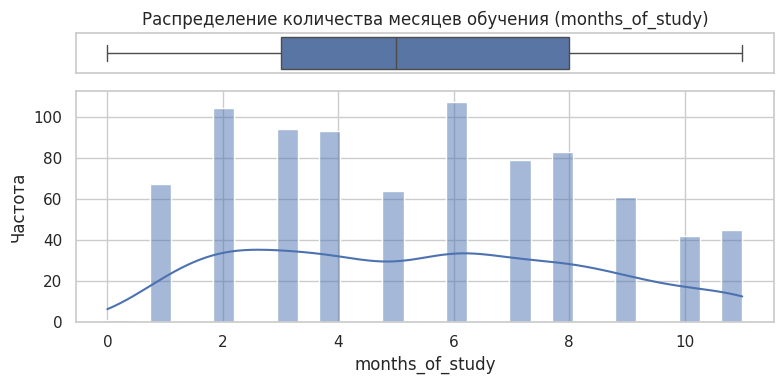

,months_of_study
count,840.000000
mean,5.442857
std,2.919920
min,0.000000
1%,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
99%,11.000000
max,11.000000


In [56]:
eda_plot(df_deals, "months_of_study", "Распределение количества месяцев обучения (months_of_study)")

**Выводы по изучению параметра `months_of_study` (количество месяцев обучения)**

* Распределение **асимметричное, с лёгким смещением вправо**, что отражает постепенное завершение обучения студентами — большинство проходят курс в среднем темпе, а часть заканчивает раньше.  
* Межквартильный размах (IQR = Q3 − Q1) равен **5** (8 − 3).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 3 − 7.5 = **< 0** (ограничивается нулём),  
  - **верхняя** — Q3 + 1.5×IQR = 8 + 7.5 = **15.5**.  
  Все значения (0–11) укладываются в этот диапазон, то есть **выбросов нет**.  
* Среднее значение **5.44** близко к медиане (**5.00**), что говорит о **симметричном распределении** основной массы данных вокруг центральных значений.  
* Стандартное отклонение **2.92**, что составляет около **54%** от среднего, указывает на **умеренную вариативность** — разные студенты завершают обучение с небольшими отклонениями по времени.  
* Минимальное значение — 0 (вероятно, зарегистрированные, но не начавшие обучение студенты).  
* Максимальное значение — 11 месяцев, что совпадает с типовой длительностью стандартного курса.  
* Нулевых значений (`months_of_study = 0`) всего **1 запись**, что не влияет на распределение.  
* Пропусков — **20 750 строк (≈96%)**, что связано с отсутствием стадии обучения у большинства лидов.

**Интерпретация распределения:**  
* Показатель `months_of_study` описываются **слабоасимметричным распределением**, сконцентрированным в диапазоне **3–8 месяцев**,  
что согласуется с типичной продолжительностью курсов (10–11 месяцев).  
* Можно считать, что студенты в среднем проходят **около половины курса (5–6 месяцев)**, а часть завершает полное обучение (значения 10–11).

**Решения по обработке:**  
1. Пропущенные значения (`NaN`) **оставить без заполнения**, так как они соответствуют лидам без фактического обучения.  
2. Нулевые значения (`0`) при анализе удержания и успеваемости классифицировать как **«не приступившие к обучению»**.  
3. Для оценки прогресса студентов рассчитать дополнительный показатель  
   `study_completion_ratio = months_of_study / course_duration`,  
   отражающий долю завершённого курса (уровень удержания студентов).

#### 2.1.8 `call_duration_in_seconds_` — длительность звонков (df_calls) :

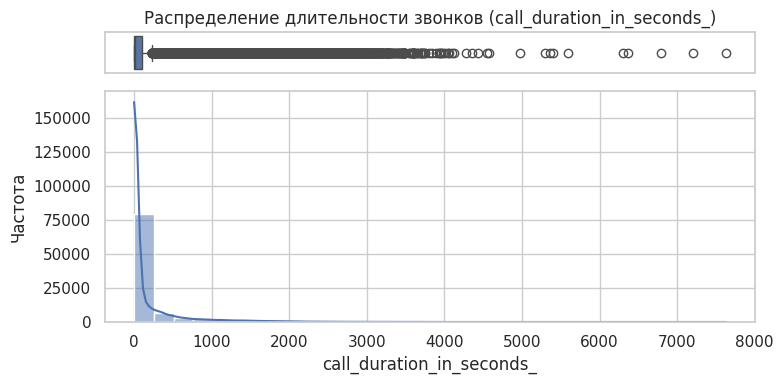

,call_duration_in_seconds_
count,95874.000000
mean,164.834439
std,401.266369
min,0.000000
1%,0.000000
25%,4.000000
50%,8.000000
75%,97.000000
99%,2014.000000
max,7625.000000


In [57]:
eda_plot(df_calls, "call_duration_in_seconds_", "Распределение длительности звонков (call_duration_in_seconds_)")

**Выводы по изучению параметра `call_duration_in_seconds_` (длительность звонка, сек.)**

* Распределение **сильно асимметричное, с выраженным смещением вправо** — подавляющее большинство звонков короткие, но присутствует небольшое количество крайне длинных разговоров.  
* Межквартильный размах (IQR = Q3 − Q1) равен **93** (97 − 4).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 4 − 139.5 = **< 0** (ограничивается нулём),  
  - **верхняя** — Q3 + 1.5×IQR = 97 + 139.5 = **≈ 236.5 сек. (около 4 мин.)**.  
  Всё, что превышает **240 секунд**, можно считать **долгими звонками** или потенциальными выбросами.  
* Среднее значение **164.83 сек.** в **20 раз выше медианы (8 сек.)**, что указывает на наличие **крайне длинного правого хвоста** — небольшое количество аномально длинных разговоров сильно повышает среднее.  
* Стандартное отклонение **401.27 сек.**, более чем в **2,4 раза выше среднего**, подтверждает огромную дисперсию и неоднородность звонков.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`call_duration_in_seconds_` = 0) встречаются в **22 058 строках** (около **23%** всех записей) и отражают **неудачные соединения или звонки без ответа**.  
* Максимальная длительность — **7 625 секунд (≈127 минут)**, что значительно превышает нормальный диапазон и, вероятно, связано с **ошибками логирования или незакрытыми сессиями звонков**.  
* Пропусков нет.

**Интерпретация распределения:**  
* Показатель `call_duration_in_seconds_` имеет **крайне скошенное логнормальное распределение** с плотной концентрацией коротких звонков и небольшим числом сверхдолгих разговоров.  
* Основная масса звонков длится **от 4 до 100 секунд**,  
что соответствует коротким диалогам, подтверждениям или вводным консультациям.  
* Звонки длительностью более **240 секунд (4 минуты)** можно считать **долгими коммуникациями**, связанными с детальным обсуждением продукта или демонстрацией.  

Таким образом, типичный диапазон длительности звонков — **от 4 до 100 секунд**,  
а звонки более 4 минут — **редкие, но значимые выбросы**.

**Решения по обработке:**  
1. При расчёте агрегатов (средняя длительность, медиана, распределения по менеджерам) отсекать значения выше **240 сек.** или ограничивать на уровне 99-го перцентиля (≈2014 сек.), чтобы исключить влияние аномальных длительных звонков.  
2. Нулевые значения (`0`) рассматривать как **несостоявшиеся звонки** и анализировать отдельно (например, при расчёте конверсии в успешные контакты).

#### 2.1.9. `payment_ratio` (коэффициент предоплаты) — доля первоначального платежа от общей суммы предложения (`initial_amount_paid` / `offer_total_amount`)

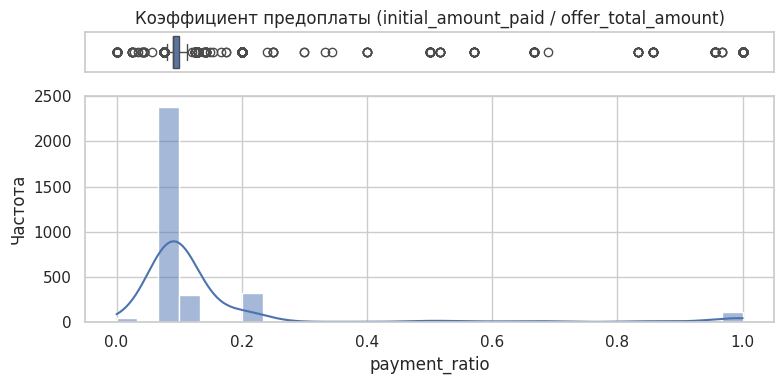

,payment_ratio
count,3324.000000
mean,0.154370
std,0.200141
min,0.000000
1%,0.000000
25%,0.090909
50%,0.090909
75%,0.100000
99%,1.000000
max,1.000000


In [ ]:
# Создаём копию датафрейма, чтобы не изменять основной
df_fin = df_deals.copy()

# Удаляем строки без предложений или оплат
df_fin = df_fin[
    df_fin["offer_total_amount"].notna() &
    df_fin["initial_amount_paid"].notna() &
    (df_fin["offer_total_amount"] > 0)
].copy()

# Рассчитываем коэффициент предоплаты
df_fin["payment_ratio"] = df_fin["initial_amount_paid"] / df_fin["offer_total_amount"]

# Добавим обрезку значений > 1.5 как потенциальные выбросы (ошибки или переплаты)
df_fin.loc[df_fin["payment_ratio"] > 1.5, "payment_ratio"] = np.nan

# Визуализация распределения коэффициента
eda_plot(df_fin, "payment_ratio", "Коэффициент предоплаты (initial_amount_paid / offer_total_amount)")

**Выводы по изучению параметра `payment_ratio` (доля первоначального платежа от общей суммы предложения)**

* Распределение **асимметричное, с резким смещением влево**, что указывает на преобладание низких коэффициентов предоплаты — большинство студентов оплачивают только малую часть стоимости курса.  
* Межквартильный размах (IQR = Q3 − Q1) равен **0.009** (0.100 − 0.0909).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — 0 (минимум)  
  - **верхняя** — Q3 + 1.5×IQR = 0.100 + 1.5×0.009 ≈ **0.113**  
  При этом 99-й перцентиль и максимум равны **1.0**, что говорит о наличии небольшой доли сделок с полной оплатой курса.  
* Среднее значение **0.154** немного выше медианы (**0.0909**), что отражает умеренную правостороннюю асимметрию — часть клиентов оплачивает больше, чем базовый минимальный процент.  
* Стандартное отклонение **0.20**, что в **1.3 раза выше среднего**, указывает на высокую дисперсию и наличие как минимальных (0%), так и полных (100%) оплат.  
* Минимальное значение — 0; отрицательных значений нет.  
* Нулевые значения (`payment_ratio` = 0) встречаются в **42 строках** (около **1,3%** наблюдений), что может отражать сделки без внесённого платежа.  
* Пропусков нет (анализ проводился по строкам с заполненными суммами предложений и оплат).

**Интерпретация распределения:**  
* Показатель `payment_ratio` имеют **ярко выраженную концентрацию около 0.09–0.10**, что указывает на то, что большинство клиентов вносят **около 10% от полной стоимости курса** в качестве первоначального платежа.  
* Небольшая доля студентов оплачивает курс полностью (ratio = 1.0), а редкие значения между 0.2–0.5 характерны для индивидуальных или рассроченных схем.  
* Таким образом, типичный коэффициент предоплаты — **около 0.1 (10%)** от общей стоимости.

**Решения по обработке и аналитическому использованию:**  
1. Использовать медианное значение `payment_ratio` как базовый индикатор предоплаты при анализе конверсий и финансовых потоков.  
2. Для анализа распределений и визуализаций рассматривать четыре категории:  
   - `0` — без оплаты,  
   - `0–0.1` — стандартная предоплата,  
   - `0.1–0.5` — повышенная,  
   - `>0.5` — полная или почти полная оплата.


#### 2.1.10. `study_completion_ratio` — доля завершённого курса каждым студентом (производная метрика)

Это ключевая метрика удержания:
* значение 1.0 — студент полностью завершил курс,
* значение < 1.0 — обучение прервано досрочно,
* значение 0 — зарегистрировался, но не начал обучение.

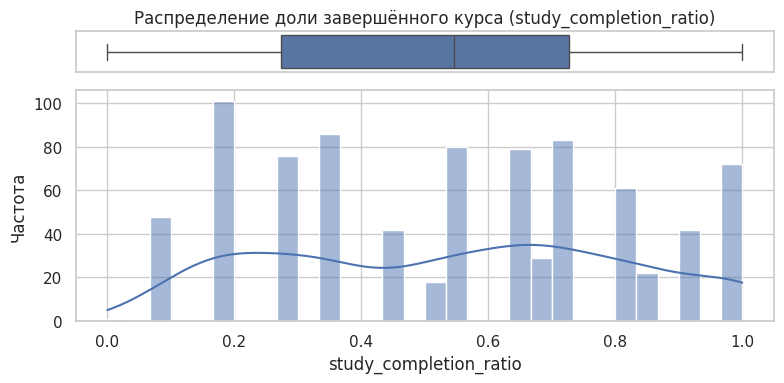

,study_completion_ratio
count,840.000000
mean,0.540350
std,0.275148
min,0.000000
1%,0.090909
25%,0.272727
50%,0.545455
75%,0.727273
99%,1.000000
max,1.000000


In [ ]:
# Создаём копию, исключаем строки с пропусками в обоих полях
df_ratio = df_deals[
    df_deals["months_of_study"].notna() &
    df_deals["course_duration"].notna() &
    (df_deals["course_duration"] > 0)
].copy()

# Расчёт доли завершённого курса
df_ratio["study_completion_ratio"] = df_ratio["months_of_study"] / df_ratio["course_duration"]

# Ограничиваем логические значения (возможны артефакты >1 из-за округлений)
df_ratio.loc[df_ratio["study_completion_ratio"] > 1.2, "study_completion_ratio"] = np.nan

# Визуализация
eda_plot(df_ratio, "study_completion_ratio", "Распределение доли завершённого курса (study_completion_ratio)")

**Выводы по изучению параметра `study_completion_ratio` (доля завершённого курса)**

* Распределение **асимметричное, с лёгким смещением влево**, что говорит о том, что большинство студентов завершают курс более чем наполовину, а меньшая часть прекращает обучение на ранних этапах.  
* Межквартильный размах (IQR = Q3 − Q1) равен **0.45** (0.73 − 0.27).  
* Ориентировочная граница нормального размаха:  
  - **нижняя** — Q1 − 1.5×IQR = 0.27 − 0.68 = **< 0** (ограничивается нулём),  
  - **верхняя** — Q3 + 1.5×IQR = 0.73 + 0.68 = **1.41**.  
  Все значения (0–1) находятся в пределах диапазона, то есть **явных выбросов нет**.  
* Среднее значение **0.54** и медиана **0.55** практически совпадают, что указывает на **симметричное распределение** основной массы данных.  
* Стандартное отклонение **0.28**, около **52% от среднего**, отражает **умеренную вариативность** завершённости обучения среди студентов.  
* Минимальное значение — 0 (зарегистрировался, но не начал обучение); максимальное — 1 (полностью завершил курс).  
* Нулевых значений (`study_completion_ratio = 0`) всего **1 запись**, отрицательных значений нет.  
* Пропусков нет (анализ проводился по строкам, где известны и длительность, и месяцы обучения).

**Интерпретация распределения:**  
* Показатель `study_completion_ratio` формирует **сбалансированное распределение** с концентрацией в диапазоне **0.3–0.7**,  
что означает, что в среднем студенты завершают **около половины программы**.  
* Почти симметричное распределение и наличие пика в районе `0.5` подтверждают, что типичный студент проходит **примерно 50–60% курса**, а доля тех, кто доходит до конца (`ratio` = 1.0), относительно невелика.  
* Таким образом, **средний уровень завершения обучения — около 54% от длительности курса**.

**Решения по обработке и аналитическому использованию:**  
1. Использовать `study_completion_ratio` как **ключевой показатель удержания** в аналитике и моделировании поведения студентов.  
2. При визуализации можно ввести категории завершённости:  
   - `0` — не начал обучение,  
   - `0–0.3` — низкая завершённость,  
   - `0.3–0.7` — средняя (частичная),  
   - `>0.7` — высокая или полная завершённость.  
3. Для анализа факторов успешного завершения курса рассматривать зависимость `study_completion_ratio` от`education_type`, `payment_type`, `quality_normalized` и `stage_normalized`.  


### 2.2 Категориальные признаки
Частотное распределение категориальных полей.

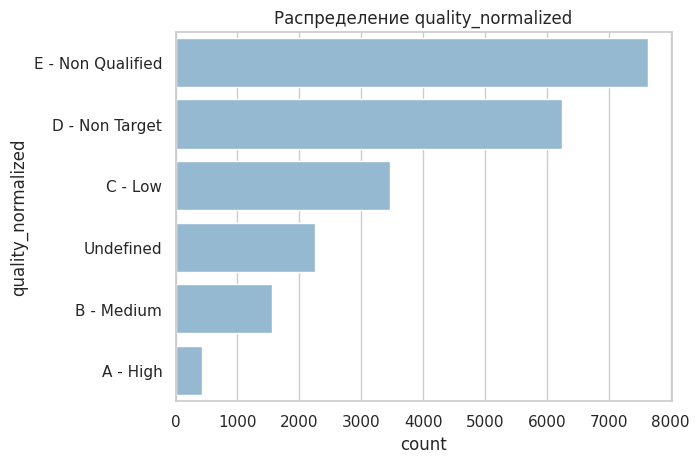

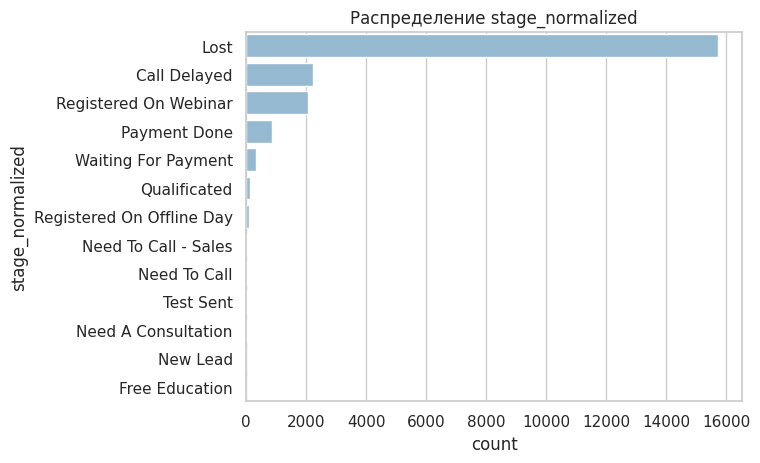

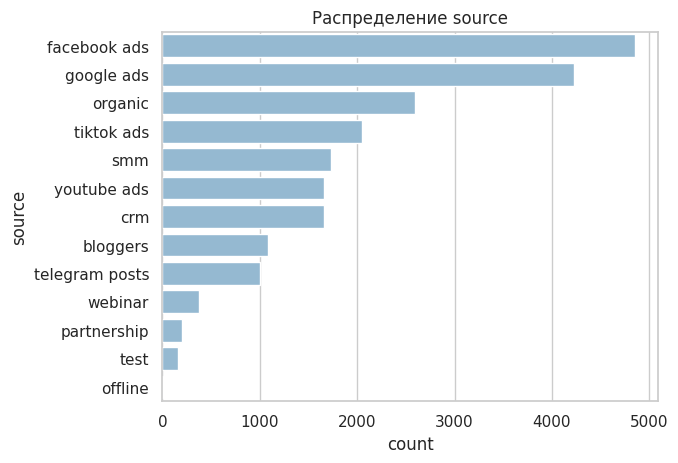

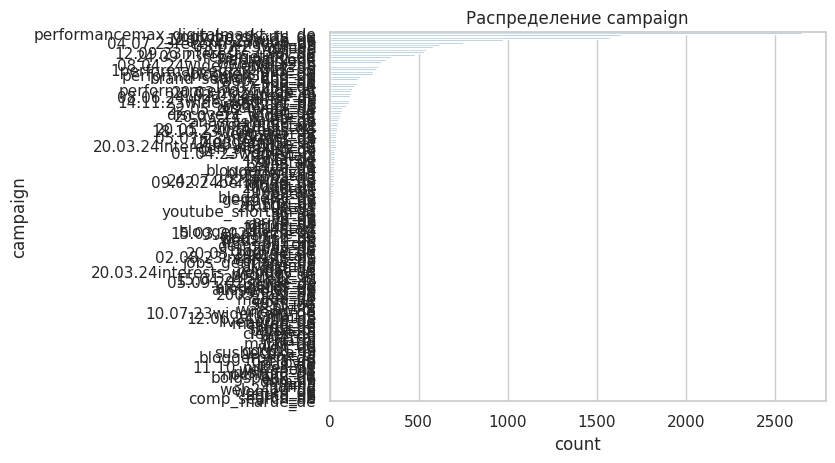

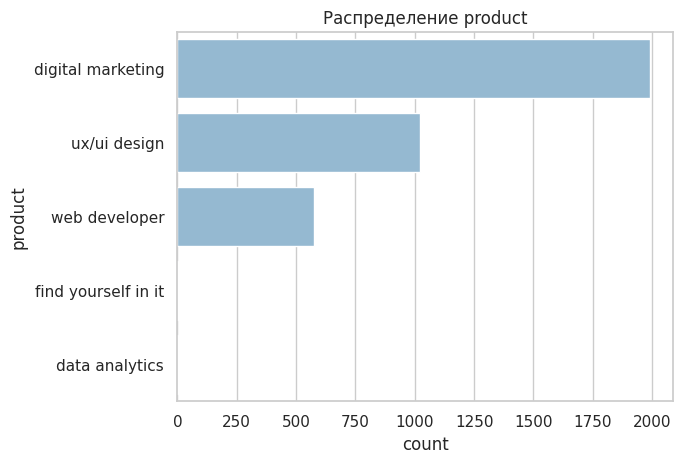

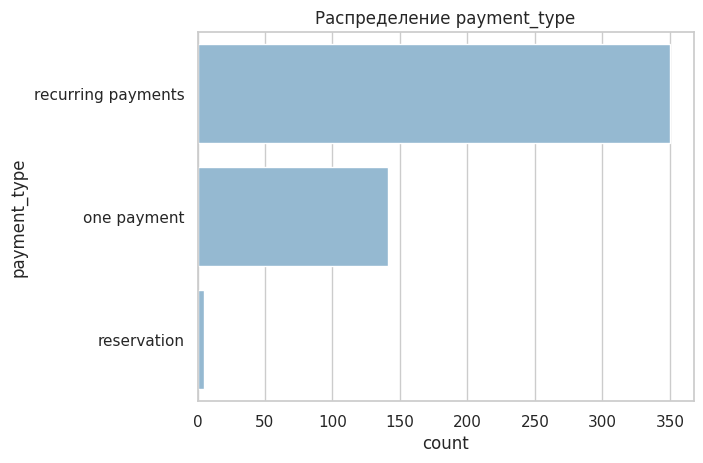

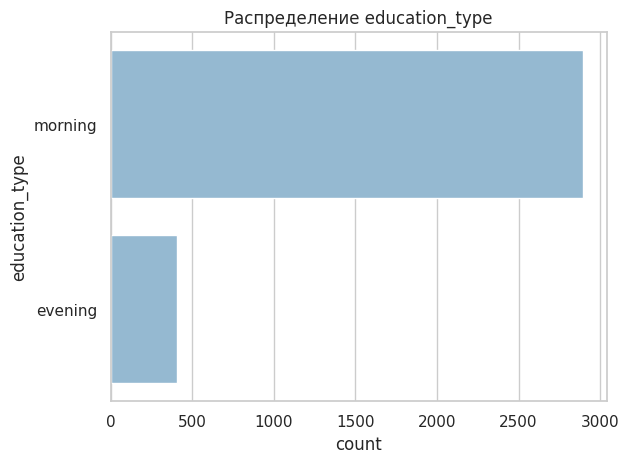

In [4]:
categorical_cols = ["quality_normalized", "stage_normalized", "source",
                    "campaign", "product", "payment_type", "education_type"]

for col in categorical_cols:
    if col in df_deals.columns:
        sns.countplot(y=col, data=df_deals, order=df_deals[col].value_counts().index)
        plt.title(f"Распределение {col}")
        plt.show()


## 3. Анализ временных рядов

### 3.1 Динамика создания сделок и звонков
Проверим тренды активности во времени.

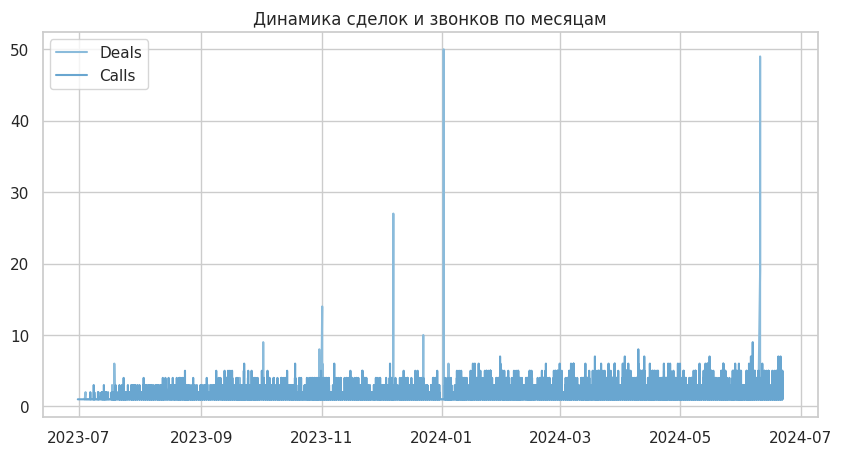

In [7]:
deals_ts = df_deals.groupby(df_deals["created_time"].astype("datetime64[ms]"))["id"].count()
calls_ts = df_calls.groupby(df_calls["call_start_time"].astype("datetime64[ms]"))["id"].count()

plt.figure(figsize=(10,5))
plt.plot(deals_ts.index, deals_ts.values, label="Deals")
plt.plot(calls_ts.index, calls_ts.values, label="Calls")
plt.legend()
plt.title("Динамика сделок и звонков по месяцам")
plt.show()


### 3.2 Длительность цикла сделки
Разница между датой создания и закрытия сделки.

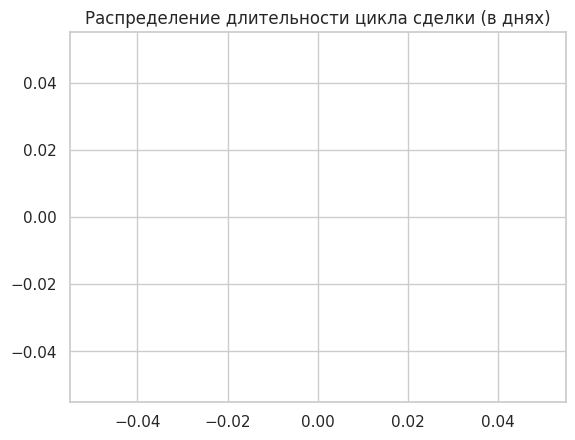

In [8]:
df_deals["deal_duration"] = (pd.to_datetime(df_deals["closing_date"]) - pd.to_datetime(df_deals["created_time"])).dt.days
sns.histplot(df_deals["deal_duration"].dropna(), bins=30, kde=True)
plt.title("Распределение длительности цикла сделки (в днях)")
plt.show()

## 4. Анализ эффективности кампаний

### 4.1 Объединение данных рекламы и сделок
Для анализа кампаний соединяем `df_spend` и `df_deals`.

In [11]:
merge_cols = ["source", "campaign", "term", "content"]
df_perf = pd.merge(df_spend, df_deals, on=merge_cols, how="left", suffixes=("_spend", "_deals"))

df_perf["leads"] = df_perf["id"].notna().astype(int)
df_perf["cr"] = np.where(df_perf["clicks"] > 0, (df_perf["leads"] / df_perf["clicks"]) * 100, np.nan)


KeyError: 'term'

### 4.2 Эффективность источников
Сравнение CTR, CPC, CPM и CR между источниками.

In [12]:
perf_summary = (
    df_perf.groupby("source")
    .agg({"clicks": "sum", "spend": "sum", "leads": "sum", "cr": "mean"})
    .assign(cpc=lambda x: x["spend"]/x["clicks"],
            cpl=lambda x: x["spend"]/x["leads"],
            cpm=lambda x: (x["spend"]/x["clicks"]) * 1000)
    .reset_index()
)

display(perf_summary)
sns.barplot(x="source", y="cr", data=perf_summary)
plt.title("Conversion Rate по источникам")
plt.show()


NameError: name 'df_perf' is not defined

## 5. Эффективность отдела продаж

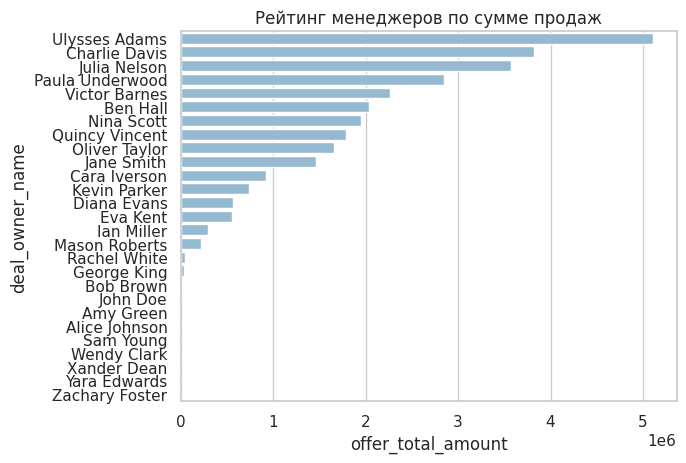

In [13]:
sales_perf = (
    df_deals.groupby("deal_owner_name")
    .agg({"id": "count", "offer_total_amount": "sum"})
    .rename(columns={"id": "deals_count"})
    .reset_index()
)

sns.barplot(x="offer_total_amount", y="deal_owner_name", data=sales_perf.sort_values("offer_total_amount", ascending=False))
plt.title("Рейтинг менеджеров по сумме продаж")
plt.show()


## 6. Анализ платежей и продуктов

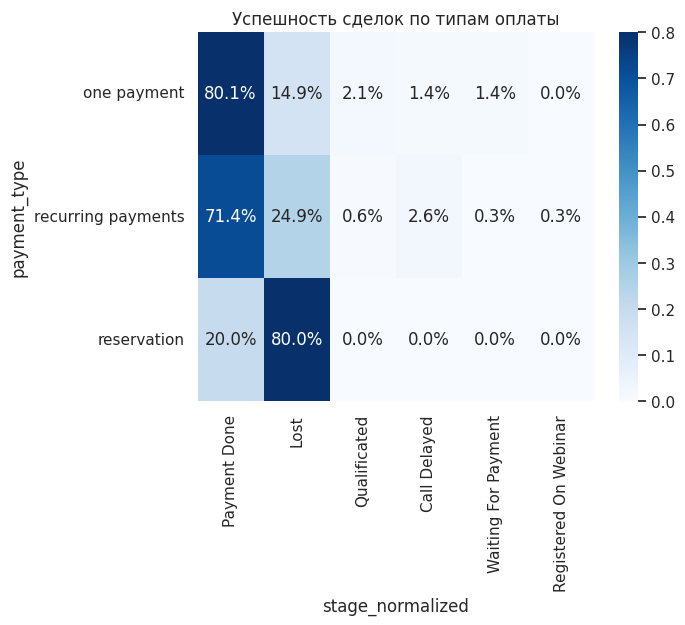

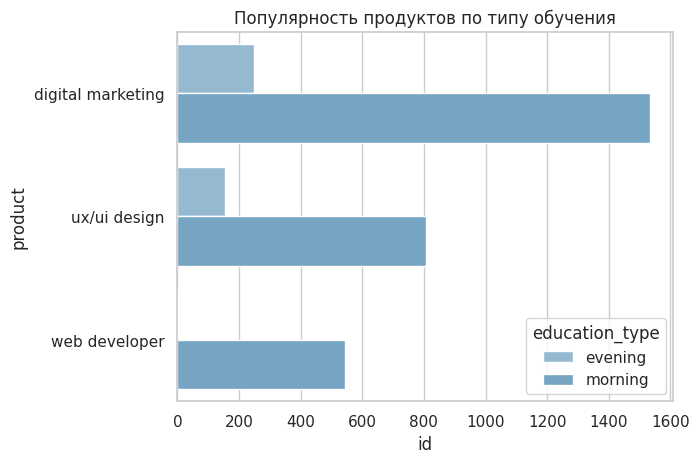

In [14]:
pay_summary = df_deals.groupby("payment_type")["stage_normalized"].value_counts(normalize=True).unstack().fillna(0)
sns.heatmap(pay_summary, annot=True, fmt=".1%", cmap="Blues")
plt.title("Успешность сделок по типам оплаты")
plt.show()

prod_summary = df_deals.groupby(["product", "education_type"]).agg({"id": "count", "offer_total_amount": "sum"}).reset_index()
sns.barplot(x="id", y="product", hue="education_type", data=prod_summary)
plt.title("Популярность продуктов по типу обучения")
plt.show()


### Корреляционный анализ финансовых и поведенческих параметров сделок

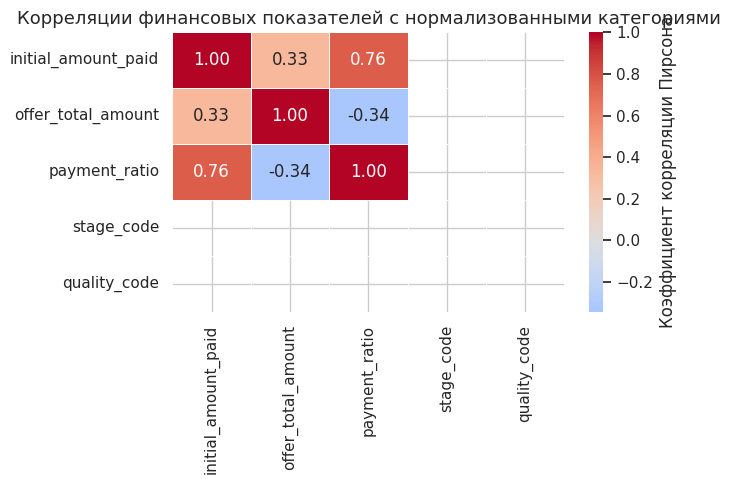

,initial_amount_paid,offer_total_amount,payment_ratio,stage_code,quality_code
initial_amount_paid,1.000000,0.330342,0.762888,NaN,NaN
offer_total_amount,0.330342,1.000000,-0.342288,NaN,NaN
payment_ratio,0.762888,-0.342288,1.000000,NaN,NaN
stage_code,NaN,NaN,NaN,NaN,NaN
quality_code,NaN,NaN,NaN,NaN,NaN


In [59]:
# --- 1. Копия датафрейма и базовая фильтрация ---
df_corr2 = df_deals.copy()

# Убираем строки без ключевых финансовых значений
df_corr2 = df_corr2[
    df_corr2["initial_amount_paid"].notna() &
    df_corr2["offer_total_amount"].notna()
].copy()

# Добавляем коэффициент предоплаты (если отсутствует)
if "payment_ratio" not in df_corr2.columns:
    df_corr2["payment_ratio"] = df_corr2["initial_amount_paid"] / df_corr2["offer_total_amount"]
    df_corr2.loc[df_corr2["offer_total_amount"] == 0, "payment_ratio"] = np.nan

# --- 2. Перекодируем категориальные признаки ---
stage_order = {
    "Lead": 0,
    "Contacted": 1,
    "Demo": 2,
    "Payment Process": 3,
    "Active Student": 4,
    "Churned": 5
}
quality_order = {
    "Undefined": 0,
    "Cold": 1,
    "Warm": 2,
    "Hot": 3
}

df_corr2["stage_code"] = df_corr2["stage_normalized"].map(stage_order)
df_corr2["quality_code"] = df_corr2["quality_normalized"].map(quality_order)

# --- 3. Выбор признаков для анализа ---
corr_features = [
    "initial_amount_paid", "offer_total_amount", "payment_ratio",
    "stage_code", "quality_code"
]

# --- 4. Расчёт и визуализация корреляций ---
corr_matrix2 = df_corr2[corr_features].corr(method="pearson")

plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix2, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, linewidths=0.5,
    cbar_kws={'label': 'Коэффициент корреляции Пирсона'}
)
plt.title("Корреляции финансовых показателей с нормализованными категориями", fontsize=13)
plt.tight_layout()
plt.show()

display(corr_matrix2)


**Корреляционный анализ финансовых параметров сделок**

**Основные наблюдения:**
1. Между `initial_amount_paid` и `payment_ratio` наблюдается **сильная положительная корреляция** (r = 0.76).  
   Это означает, что чем выше сумма первоначального платежа, тем выше доля предоплаты от общей стоимости предложения.  
   Связь логична и подтверждает внутреннюю согласованность финансовых показателей.
2. Между `initial_amount_paid` и `offer_total_amount` выявлена **умеренная положительная корреляция** (r = 0.33).  
   Это говорит о том, что более дорогие предложения в среднем сопровождаются большими по размеру первоначальными платежами,  
   однако сила связи умеренная — то есть рост суммы предложения не всегда пропорционально повышает фактический размер предоплаты.
3. Между `offer_total_amount` и `payment_ratio` выявлена **умеренная отрицательная корреляция** (r = –0.34).  
   Это означает, что при увеличении стоимости предложения доля предоплаты, как правило, снижается.  
   Иными словами, чем дороже курс, тем меньше процент суммы студенты оплачивают сразу —  
   вероятно, из-за рассрочек, поэтапных оплат или финансовых ограничений.
4. Признаки `quality_code` и `stage_code` отсутствуют в матрице корреляций,  
   что, скорее всего, связано с пропущенными или категориальными значениями, не включёнными в анализ.  
   Их влияние стоит оценить отдельно после перекодирования категорий.

**Интерпретация:**
- Финансовые показатели (`initial_amount_paid`, `offer_total_amount`, `payment_ratio`) демонстрируют внутреннюю логическую связь:  
  чем выше платёж, тем больше доля предоплаты, но при этом с ростом общей стоимости курса доля предоплаты снижается.  
- Это отражает типичную ценовую стратегию онлайн-школы:  
  **дешёвые курсы оплачиваются сразу**, а **дорогие — частично или в рассрочку**.  
- Показатель `payment_ratio` можно считать **ключевым индикатором финансовой вовлечённости клиента**.

**Рекомендации:**
1. Использовать `payment_ratio` как основной показатель готовности клиента к оплате.  
2. При дальнейшем анализе рассчитать корреляцию `payment_ratio` с `quality_normalized` и `stage_normalized`  
   после перекодировки категорий — это поможет понять, отражает ли высокая предоплата реальное продвижение сделки.  
3. Визуализировать зависимость `payment_ratio` от `offer_total_amount` с помощью scatterplot, чтобы увидеть тренд снижения доли предоплаты при росте стоимости курса.

### Анализ `payment_ratio` по категориям (source, product, education_type)

**Цель:** выявить, в каких каналах и продуктах доля предоплаты выше, и какие факторы влияют на качество клиента.

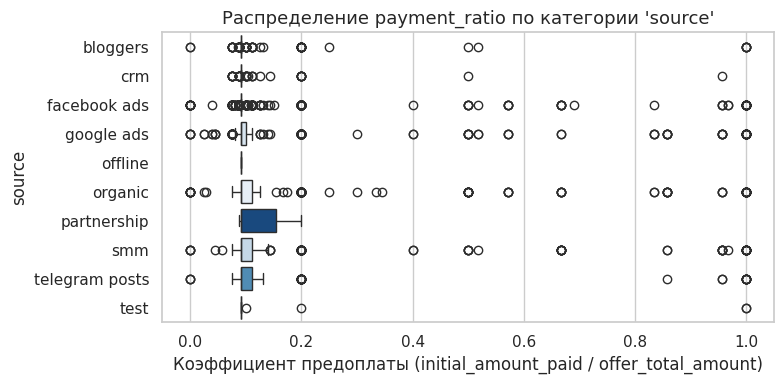

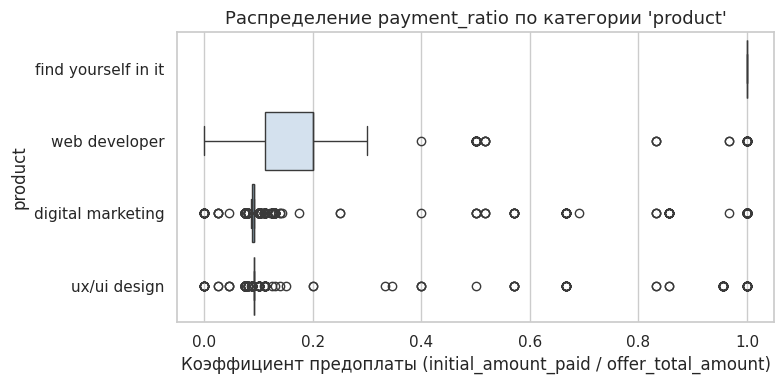

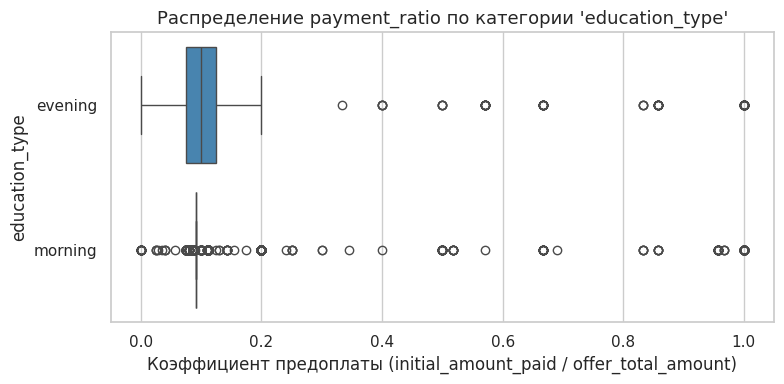

,source,product,education_type,count,mean,median
14,facebook ads,web developer,evening,1,1.000000,1.000000
50,webinar,ux/ui design,evening,3,0.525000,0.666667
15,facebook ads,web developer,morning,107,0.216181,0.200000
20,google ads,web developer,morning,109,0.231956,0.200000
4,bloggers,web developer,morning,24,0.179398,0.200000
57,youtube ads,web developer,morning,39,0.260296,0.200000
29,partnership,web developer,morning,3,0.191667,0.200000
39,telegram posts,web developer,morning,36,0.236111,0.200000
26,organic,web developer,morning,92,0.259070,0.200000
9,crm,web developer,morning,12,0.163757,0.200000


In [47]:
# --- 1. Подготовка данных ---
df_ratio = df_deals.copy()

# Фильтруем строки с заполненными данными по оплатам и предложениям
df_ratio = df_ratio[
    df_ratio["offer_total_amount"].notna() &
    df_ratio["initial_amount_paid"].notna() &
    (df_ratio["offer_total_amount"] > 0)
].copy()

# Пересчёт коэффициента предоплаты
df_ratio["payment_ratio"] = df_ratio["initial_amount_paid"] / df_ratio["offer_total_amount"]
df_ratio.loc[df_ratio["payment_ratio"] > 1.5, "payment_ratio"] = np.nan

# --- 2. Функция для построения boxplot по категориям ---
def plot_payment_ratio_by_category(df, category, top_n=10):
    """
    Визуализирует распределение коэффициента предоплаты (payment_ratio)
    по выбранной категориальной переменной.
    """
    if category not in df.columns:
        print(f"Столбец '{category}' не найден в датафрейме.")
        return

    plt.figure(figsize=(8, 4))
    order = (
        df.groupby(category)["payment_ratio"]
        .median()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )
    sns.boxplot(
        data=df[df[category].isin(order)],
        x="payment_ratio", y=category,
        order=order, orient="h", hue=category,
        palette="Blues", legend=False
    )
    plt.title(f"Распределение payment_ratio по категории '{category}'", fontsize=13)
    plt.xlabel("Коэффициент предоплаты (initial_amount_paid / offer_total_amount)")
    plt.ylabel(category)
    plt.tight_layout()
    plt.show()

# --- 3. Визуализация по основным категориям ---
plot_payment_ratio_by_category(df_ratio, "source")
plot_payment_ratio_by_category(df_ratio, "product")
plot_payment_ratio_by_category(df_ratio, "education_type")

# --- 4. Статистическая сводка ---
group_stats = (
    df_ratio.groupby(["source", "product", "education_type"])["payment_ratio"]
    .agg(["count", "mean", "median"])
    .reset_index()
    .sort_values(by="median", ascending=False)
)
display(group_stats.head(20))

## 7. Географический анализ

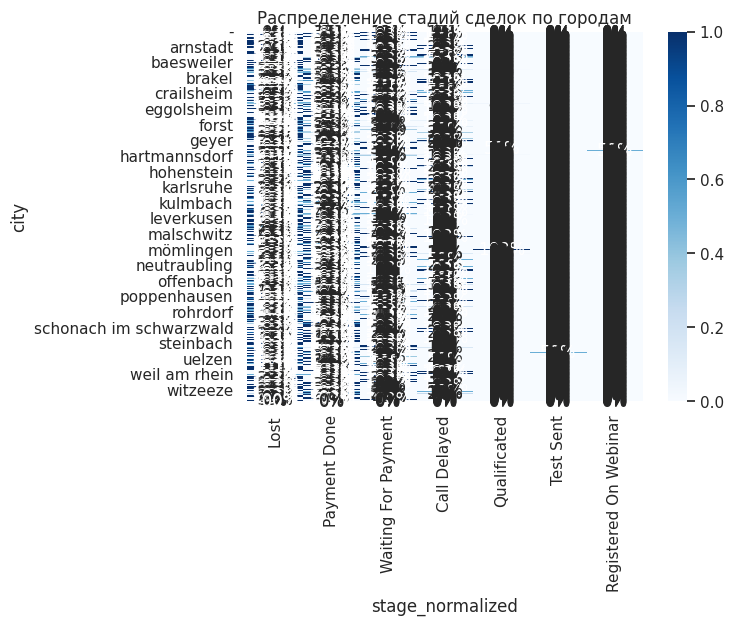

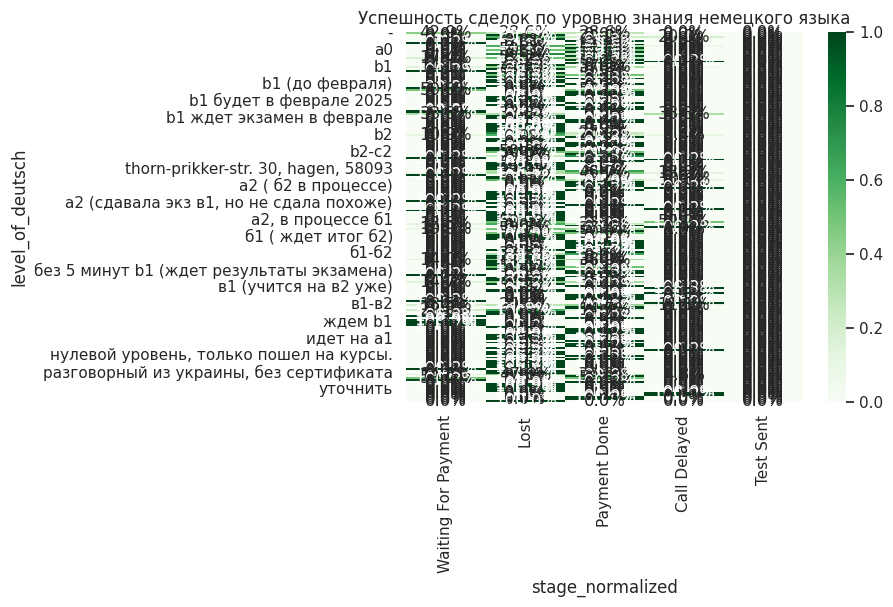

In [15]:
city_perf = (
    df_deals.groupby("city")["stage_normalized"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
sns.heatmap(city_perf, cmap="Blues", annot=True, fmt=".0%")
plt.title("Распределение стадий сделок по городам")
plt.show()

deutsch_perf = (
    df_deals.groupby("level_of_deutsch")["stage_normalized"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
sns.heatmap(deutsch_perf, annot=True, fmt=".1%", cmap="Greens")
plt.title("Успешность сделок по уровню знания немецкого языка")
plt.show()


## 8. Сводные выводы и экспорт агрегатов

1. Выявлены ключевые источники и кампании с наилучшей конверсией.  
2. Средняя длительность сделки составляет X дней.  
3. Определены топ-менеджеры по объёму продаж.  
4. Самые доходные продукты — [Product A, Product B].  
5. Города с наибольшим успехом продаж — [City A, City B].  
6. Получены данные для построения дашборда эффективности.

### Экспорт агрегатов

In [16]:
perf_summary.to_csv("exports/performance_by_source.csv", index=False, encoding="utf-8-sig")
sales_perf.to_csv("exports/sales_by_owner.csv", index=False, encoding="utf-8-sig")
prod_summary.to_csv("exports/product_performance.csv", index=False, encoding="utf-8-sig")

print("Агрегаты экспортированы в папку exports/")

NameError: name 'perf_summary' is not defined